In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle as pkl
from train_data_gen import grid2D, data_gen

In [2]:
def zero_isocontour(a,b,p,theta):
    r = a * math.cos(p * theta) + b
    dr = - a * p * math.sin(p * theta)
    ddr = - a * (p ** 2) * math.cos(p * theta)
    return r, dr, ddr
def analytic_curvature(r, dr, ddr):
    return ((r ** 2) + 2 * (dr ** 2) - r * ddr) / (((r ** 2) + (dr ** 2)) ** (3/2))

In [3]:
# N = 107
# xmin = -0.207843
# xmax = 0.207843
# ymin = -0.207843
# ymax = 0.207843

N = 256
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5

a = 0.05 # 0.05 for smooth flower and 0.075 for sharp flower
b = 0.15
p = 3

x0 = 0.0
y0 = 0.0





data_gen_ = data_gen(xmin, xmax, ymin, ymax, N)

In [4]:
solution = np.loadtxt('./solution.txt')

In [5]:
solution[-1]

0.612068

In [16]:
theta = np.linspace(0, 2 * np.pi,600)

r = 0.05 * np.cos(3 * theta) + 0.15

petal_x = r * np.cos(theta)
petal_y = r * np.sin(theta)

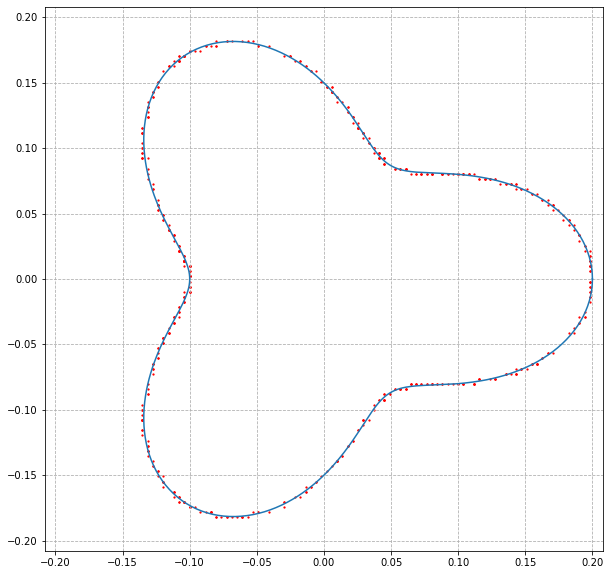

In [21]:
dataset = []
label = []

fig = plt.figure(figsize=(10,10))
plt.plot(petal_x, petal_y)
for i in range(552):
    data_tensor = torch.zeros(9)
    k = 0
    hk = 0

    theta = np.random.uniform(0,2 * math.acos(-1))
    r, dr, ddr = zero_isocontour(a,b,p,theta)

    node_indexs = data_gen_.get_data_pt(r, x0, y0, theta)

    for j in range(9):
        x = data_gen_.grid.x_from_n(node_indexs[j])
        y = data_gen_.grid.y_from_n(node_indexs[j])
        #plt.scatter(x,y)
        
        theta = math.atan2(y,x)
        
        if j == 4:
            #print('ij')
            r, dr, ddr = zero_isocontour(a,b,p,theta)
            plt.scatter(x,y,s = 2, c='r')
        
        index = int(node_indexs[j].item())
        data_tensor[j] = solution[index]


    k = analytic_curvature(r, dr, ddr)
    hk = k * data_gen_.grid.dx
    #print(data_gen_.grid.dx)

    dataset.append(data_tensor)
    label.append(torch.tensor([hk]))

plt.xlim([-0.207843, 0.207843])
plt.ylim([-0.207843, 0.207843])
plt.grid(linestyle='--')

In [7]:
# pkl.dump(torch.stack(dataset, 0), open('./10_reinit_data.pkl', 'wb'))
# pkl.dump(torch.stack(label, 0), open('./10_reinit_label.pkl', 'wb'))

Generate Picture

In [22]:
def sdf_circular(x, y, x0, y0, r):
    return math.sqrt( (x - x0) ** 2 + (y - y0) ** 2 ) - r

def nsdf_circular(x, y, x0, y0, r):
    return (x - x0) ** 2 + (y - y0) ** 2 - r ** 2

In [26]:
N = 256
xmin = 0
xmax = 1
ymin = 0
ymax = 1

x0 = 0.5
y0 = 0.5

data_gen_ = data_gen(xmin, xmax, ymin, ymax, N)

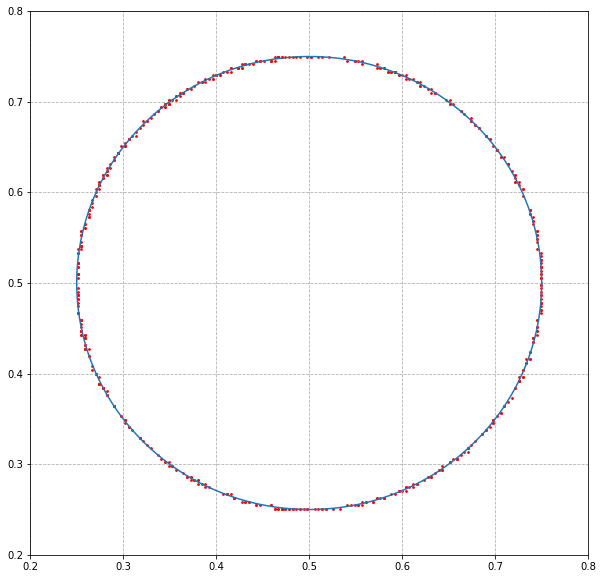

In [30]:

theta = np.linspace(0, 2 * np.pi,600)
r = 0.25

petal_x = r * np.cos(theta) + 0.5
petal_y = r * np.sin(theta) + 0.5

fig = plt.figure(figsize=(10,10))
plt.plot(petal_x, petal_y)
for i in range(552):
    theta = np.random.uniform(0,2 * math.acos(-1))

    node_indexs = data_gen_.get_data_pt(r, x0, y0, theta)

    for j in range(9):
        x = data_gen_.grid.x_from_n(node_indexs[j])
        y = data_gen_.grid.y_from_n(node_indexs[j])
        #plt.scatter(x,y)
        
        if j == 4:
            plt.scatter(x,y,s = 3, c='r')

plt.xlim([0.2, 0.8])
plt.ylim([0.2, 0.8])
plt.grid(linestyle='--')